In [1]:
'''
Example of lines plots for ATSC 270

1.Reads in text files of 2 m temperature data 
2.Each text file has GFK temp for each hour from 1 UTC - 23 UTC on 2/21/22 
for a totoal of 23 data points 
3.Text files must be in same directory as code (unless code is updated)

Written: Aaron Scott, UND Spring 2022
Last updated: 2/23/22
'''
import matplotlib.pyplot as plt

#read in data in text files 
#hrrr temp at 2 m in Fahrenheit 
hrrr_temp = [] #create empty list 
with open('hrrr_temp.txt','r') as f: #open text file as a file-object 
    for line in f: #loop through each line of file-object 
        hrrr_temp.append(float(line)) #convert to float and append to list 
#asos temp at 2 m in Fahrenheit 
asos_temp = []
with open('asos_temp.txt','r') as f:
    for line in f:
        asos_temp.append(float(line))

This link shows examples from the matplotlib documentation:<br>
<https://matplotlib.org/stable/plot_types/index>

### Try to plot ASOS 2 m Temp below using a bar chart!

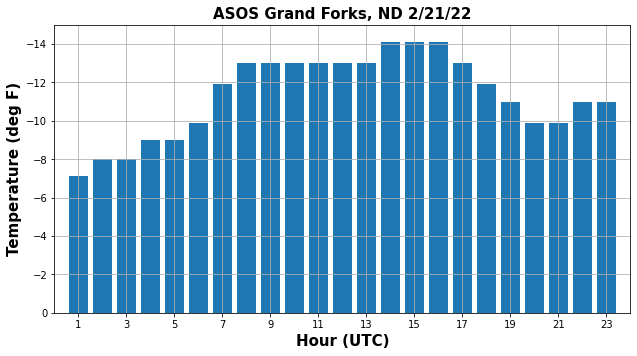

In [10]:
#method 2 
#Manually create Figure object and Axes object (The OO-P style)

#generate list of UTC times that go with data 
UTC_times = [val for val in range(1,24,1)] #data starts at 1 UTC and ends at 23 UTC

fig = plt.figure(figsize=(8,4)) #create figure object and store in variable named fig; note the specified figure size
ax = fig.add_axes([0,0,1,1]) #create axes object attached to figure object; add_axes is a method of the figure object
ax.bar(range(1,24),asos_temp) #make the x-axis such that the first bar is plotted at x=1 and last at x=23
ax.set_title('ASOS Grand Forks, ND 2/21/22',size=15,fontweight='bold')
ax.set_ylabel('Temperature (deg F)',size=15,fontweight='bold')
ax.set_xlabel('Hour (UTC)',size=15,fontweight='bold')
#make ticks from 1-23 UTC at every other hour 
ax.set_xticks(range(1,24,2)) #range function returns sequence of numbers and passes to xticks function
ax.set_ylim(0,-15) #set y limits 
ax.set_xlim(0,24) #set x limits 
ax.grid() #show grid 

## Write function below to calculate Max and Min of temp list

In [11]:
def stats(temp_list):
    current_max = temp_list[0]
    current_min = temp_list[0]
    
    for val in temp_list:
        if val > current_max:
            current_max = val
            
        if val < current_min:
            current_min = val
    
    return current_max, current_min

In [13]:
#call asos temp stats here - unpack as a tuple
asos_max, asos_min = stats(asos_temp)

In [16]:
#call hrrr temp stats here - unpack as a tuple
hrrr_max, hrrr_min = stats(hrrr_temp)

## Create new list of make a bar plot!

In [18]:
#create a new list that has all 4 values computed above (asos_max,hrrr_max,asos_min,hrrr_min)
max_min = [] #creation of list to append values 
max_min.append(asos_max)
max_min.append(hrrr_max)
max_min.append(asos_min)
max_min.append(hrrr_min)

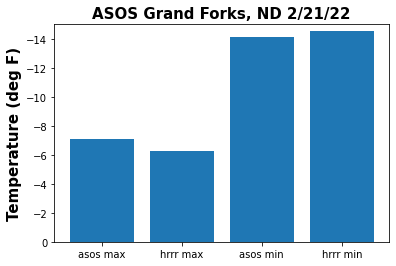

In [28]:
#create bar plot here of the 4 values 
#label the x ticks (asos max, hrrr max, asos min, hrrr min)
#Using method 1 here 

#must pass in x and y: x: range(4) creates sequence 0,1,2,3 and tells the bar function to plot the bars at these x locations
# y: the height (the data to the plotted)
plt.xticks(range(4),labels=['asos max','hrrr max','asos min','hrrr min'])
plt.bar(range(4),max_min) 
plt.title('ASOS Grand Forks, ND 2/21/22',size=15,fontweight='bold')
plt.ylabel('Temperature (deg F)',size=15,fontweight='bold')
plt.ylim(0,-15)
plt.show()